# <center> **Demo: Communities over CoyPU Knowledge Graph**

### Design patterns describing the Community Detection 

<center><img src="https://raw.githubusercontent.com/SDM-TIB/CoyPU_communities_demo/main/Images/Design_patterns.png" alt="Design patterns describing CommunityDetection"/>

## **Use case 1**: Given a country and a specific year, identify its communities of relatedness between Countries-Indicators and predict relationships.

<center><img src="https://raw.githubusercontent.com/SDM-TIB/CoyPU_communities_demo/main/Images/CoyPU_KG_2022.png" alt="CommunityDetection"/>

### CoyPU KG contains a huge amount of data about all the countries around the world, including each country's performance based on thousands of indicators. 
***
###  **Aim**: Generate communities of Country-Indicator and predict relationships between them.
***
### Thus, we can identify countries with similar behavior concerning a group of indicators and predict new unknown links in the KG.

# <center> Detecting clusters of relatedness between Countries-Indicators

In [1]:
import pandas as pd
import json

from ipycytoscape import *
import ipywidgets as widgets
from ipywidgets import GridspecLayout
from IPython.display import clear_output
import os
# from Utility import *
import seaborn as sns
import matplotlib.pyplot as plt
import requests

### Select the Country to study

In [2]:
content = 'https://raw.githubusercontent.com/SDM-TIB/CoyPU_demo_LDM/main/'
path = 'PatternDetection/__clusteringMeasures__/'
model, th, cluster = 'ERMLP/', 'SemEP_40/', 'clusters'
path_model = path+model
path_model_th = path+model+th
path_model_th_cls = path+model+th+cluster

url = content+'Visualizing_Cluster/Utility.py'
# Send the request to GitHub to get the file content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the file
    file_content = response.text
    
    # Define a dictionary to hold the module's global variables
    module_globals = {}
    
    # Execute the file content in the dictionary's context
    exec(file_content, module_globals)
else:
    print(f'Failed to download the file: {response.status_code}')

In [3]:
prediction = pd.read_csv(content + path_model_th + 'prediction.txt', delimiter="\t", header=None)
prediction.columns = ['col1', 'col2', 'category', 'weight']

In [4]:
df_country = pd.read_csv(content + 'Extracting_Data_Skynet/dataset/country_label.csv')
country_list = list(df_country.label_country.unique())
dict_country = dict(zip(df_country.label_country, df_country.country))
replacement_map = dict(zip(df_country.country, df_country.label_country))

In [5]:
country_label1 = widgets.Combobox(
    # value='John',
    placeholder='Write a country name',
    options=country_list,
    description='Select Country:',
    ensure_option=True,
    disabled=False
)


button_cui1 = widgets.Button(description="Add Country")

def create_expanded_button(description, button_style):
    return widgets.Button(description=description, button_style=button_style,
                          layout=widgets.Layout(height='auto', width='auto'))

grid = GridspecLayout(1, 2, height='60px')
grid[0, 0] = country_label1 # label_cui1
grid[0, 1] = button_cui1

display(grid)

GridspecLayout(children=(Combobox(value='', description='Select Country:', ensure_option=True, layout=Layout(g…

### Select the Cluster to be visualized

In [6]:
dropdown_cluster = widgets.Dropdown(options = {}, description='Cluster:')
# dropdown_cluster.options=entries
display(dropdown_cluster)

Dropdown(description='Cluster:', options={}, value=None)

In [7]:
def button_cui1_clicked(parm):
    select_cluster = module_globals['select_cluster']
    dropdown_cluster.options = select_cluster(dict_country[grid[0, 0].value], path_model_th_cls, content)

grid[0, 1].on_click(button_cui1_clicked)

### Visualize the cluster selected

In [8]:
button = widgets.Button(description="Visualize")
output_2 = widgets.Output()
display(button, output_2)

def on_button_clicked(tfry):
    with output_2:
        clear_output(wait=True)
#         graph_json = create_json_to_cytoscape(cls)
        create_graph_cytoscape = module_globals['create_graph_cytoscape']
        display(create_graph_cytoscape(path_model_th_cls, dropdown_cluster.value, prediction, replacement_map, content))

button.on_click(on_button_clicked)

Button(description='Visualize', style=ButtonStyle())

Output()

## **Use case 2**: Given a country and a specific year, analyze its performance based on a set of economic indicators.

In [9]:
path_c2 = 'PatternDetection/clusteringMeasures/'
model_c2, th_c2, cluster_c2 = 'TransH/', 'SemEP_32/', 'clusters'
path_model_c2 = path_c2+model_c2
path_model_th_c2 = path_c2+model_c2+th_c2
path_model_th_cls_c2 = path_c2+model_c2+th_c2+cluster_c2
indicator_val = pd.read_csv(content + 'Extracting_Data_Skynet/dataset/indicator_value.csv')

In [10]:
country_label_c2 = widgets.Combobox(
    # value='John',
    placeholder='Write a country name',
    options=country_list,
    description='Select Country:',
    ensure_option=True,
    disabled=False
)

# button_cui_c2 = widgets.Button(description="Add Country")

grid_c2 = GridspecLayout(1, 1, height='60px')
grid_c2[0, 0] = country_label_c2 # label_cui1
# grid_c2[0, 1] = button_cui_c2

display(grid_c2)

GridspecLayout(children=(Combobox(value='', description='Select Country:', ensure_option=True, layout=Layout(g…

In [14]:
def get_boxplot(df, ax1, country_idx):
    my_colors=['#2A9D8F', '#E9C46A'] # '#264653',
    sns.set_palette( my_colors )
    sns.boxplot(ax=ax1, x="p", y="o", data=df, hue="cluster")

    # Add in points to show each observation
    sns.stripplot(ax=ax1, x="p", y="o", data=df, hue="cluster",  legend=False, dodge=True, size=4, palette='dark:.3')

    # ax.set_xticklabels(df1.p.unique(), rotation=45)

    # Tweak the visual presentation
#     ax1.xaxis.grid(True)
    ax1.set(ylabel="")
    ax1.set(xlabel="")
#     ax1.get_legend().set_visible(False)
#     ax1.set_xlabel(df.p.unique()[0], fontsize=14)
    ax1.tick_params(labelsize=18)
#     ax1.set_title(df.p.unique()[0], fontsize=16)
    sns.despine(left=True)
    # for legend text
    plt.setp(ax1.get_legend().get_texts(), fontsize='14')  
    # for legend title
    plt.setp(ax1.get_legend().get_title(), fontsize='16')

    country_idx = -0.2 if country_idx == 0 else 0.2
    ax1.annotate(grid_c2[0, 0].value,
                xy=(country_idx, df.loc[df.s==dict_country[grid_c2[0, 0].value]].o.values[0]), xycoords='data',
                xytext=(.4, .4), textcoords='axes fraction',
                horizontalalignment="center",
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                bbox=dict(boxstyle="round", fc="w"), fontsize=14
                )

      
def get_cluster(country, path_model_th_cls, content):
#     entries = os.listdir(path_model_th_cls)
    get_entries = module_globals['get_entries']
    entries = get_entries(path_model_th_cls)
    country_cls = pd.DataFrame()
    country_idx = 1
    for idx, name in enumerate(entries):
        cls = pd.read_csv(content + path_model_th_cls + '/' + name, delimiter="\t", header=None)
        cls.columns = ['s']
        cls['cluster'] = 'cluster ' + str(idx+1)
        country_cls = pd.concat([country_cls, cls])
        if country in cls.s.to_list():
            country_idx = idx
    return country_cls, country_idx

# Analysis

Button(description='Visualize', style=ButtonStyle())

Output()

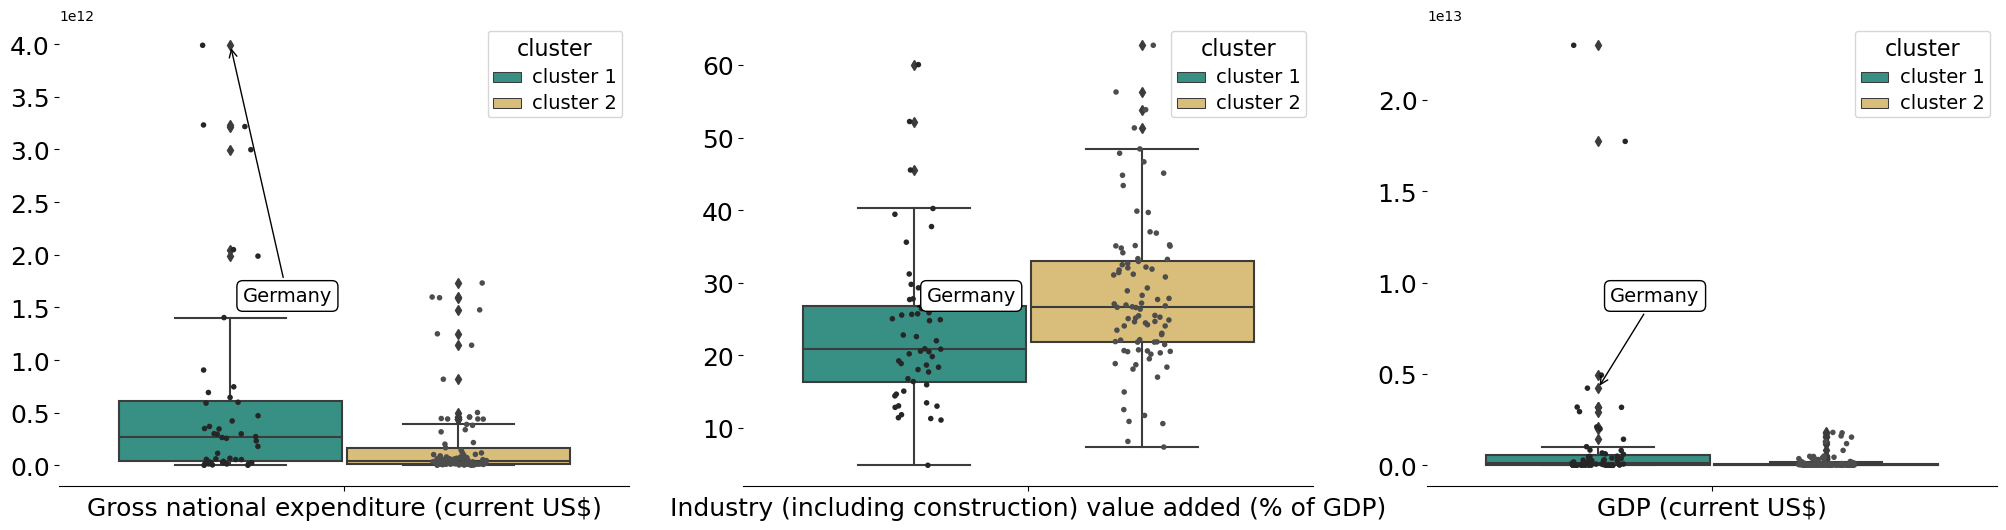

In [15]:
button_plot = widgets.Button(description="Visualize")
output_3 = widgets.Output()
def on_button_clicked(parm):
    with output_3:
        clear_output(wait=True)
#         cls = get_cluster(dict_country[grid_c2[0, 0].value], path_model_th_cls_c2)
        country_cls, country_idx = get_cluster(dict_country[grid_c2[0, 0].value], path_model_th_cls_c2)
        df = pd.merge(indicator_val, country_cls, on='s')
#         'Industry (including construction) value added (% of GDP)', 'GDP per capita (current LCU)', 'Gini index'
        df = df.loc[df.p.isin(['Gross national expenditure (current US$)',
                               'Industry (including construction) value added (% of GDP)', 'GDP (current US$)'])]
        df = df.sort_values(by=['cluster'], ascending=True)
        df1 = df.loc[df.p=='Gross national expenditure (current US$)']
        df2 = df.loc[df.p=='Industry (including construction) value added (% of GDP)']
        df3 = df.loc[df.p=='GDP (current US$)']
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 6))
        if df1.empty==False | df1.loc[df1.s==dict_country[grid_c2[0, 0].value]].empty==False:
            get_boxplot(df1, ax1, country_idx)
        if df2.empty==False | df2.loc[df2.s==dict_country[grid_c2[0, 0].value]].empty==False:
            get_boxplot(df2, ax2, country_idx)
        if df3.empty==False | df3.loc[df3.s==dict_country[grid_c2[0, 0].value]].empty==False:
            get_boxplot(df3, ax3, country_idx)
        display(fig)

        
display(button_plot, output_3)
button_plot.on_click(on_button_clicked)

In [ ]:
# <center><span style="font-family:times; font-size:2em;">__Communities over CoyPU Knowledge Graph__</span>

In [ ]:
# <span style="font-family:times; font-size:2em;text-align: center;">__Use case 1__: Given a country and a specific year, generate communities of similar countries and indicators.</span>